# Investigating likelihood ratio tests

In [16]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [20]:
n = 10
nums = np.arange(0,11,1)

coin1 = binom(n,0.5)
coin2 = binom(n,0.7)

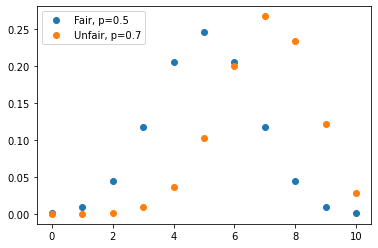

In [62]:
# Visualise the pmf
    
plt.plot(nums,coin1.pmf(nums),'o',label="Fair, p=0.5")
plt.plot(nums,coin2.pmf(nums),'o',label="Unfair, p=0.7")
plt.legend()

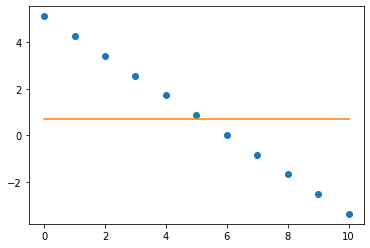

In [59]:
# Plot the likelihood ratio and the c-level.

c = 2
c_plot = list(c for i in range(len(nums)))

plt.plot(nums,np.log(coin1.pmf(nums)/coin2.pmf(nums)),'o',label="Fair")
plt.plot(nums,np.log(c_plot))

# Since the likelihood ratio is monotonic decreasing, the acceptance region is of the sort X > ... 
max_n = max(np.argwhere(np.log(coin1.pmf(nums)/coin2.pmf(nums)) > np.log(c_plot)))[0]

       Acceptance region  	 Rejection region


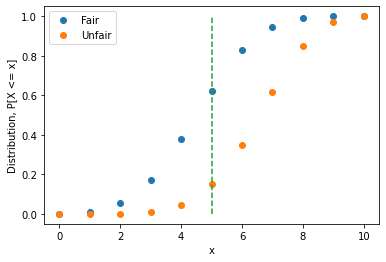

In [58]:
# What is the probability of an error? It is P(x is in acceptance region | H0 is false) - T2 - OR P(x is in rejection region | H0 is true) - T1
plt.plot(nums,coin1.cdf(nums),'o',label="Fair")
plt.plot(nums,coin2.cdf(nums),'o',label="Unfair")
plt.plot([max_n,max_n],[0,1],'--')
plt.xlabel("x")
plt.ylabel("Distribution, P[X <= x]")
plt.legend()
print("       Acceptance region  \t Rejection region")

In [ ]:
# And so, if you want a certain type 1 error rate, you can choose c such that you get that (kind of)

In [ ]:
# What if you have different priors?
# That is, now you have 10 coins, 3 of which are fair and 7 of which are unfair (same probabilites as above)

# Now, P(H_0) = P(choosing fair coin) = 3/10
# P(H_A) = P(choosing unfair coin) = 7/10



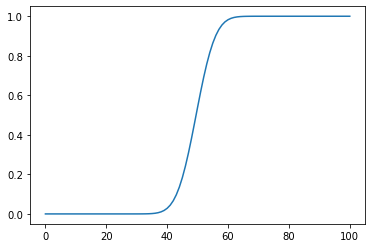

In [69]:
q3 = binom(100,0.5)

nums = np.arange(0,101,1)

plt.plot(nums,q3.cdf(nums),'-')

In [72]:
q3.cdf(40)+(q3.cdf(100)-q3.cdf(60))

0.046044066929342764

# Investigating the distribution of the sample variance of normal

In [211]:
from scipy.stats import norm
from scipy.stats import chi2

In [240]:
# Define sample size
n = 1000

# Define parameters of our normal
mean = 0
stdev = 5

# Define our normal
z = norm(mean,stdev)

Let $X_1,X_2...X_n$ be i.i.d. $\mathcal{N}(\mu,\sigma^2)$ draws, where the parameters are as defined above.
Then, we will show that, for the unbiased sample variance $S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \overline{X}) $

$$ (n-1)\frac{S^2}{\sigma^2} \sim \chi_{n-1}^2$$

To do this, we get many instances of $S^2$, scale it by $\frac{(n-1)}{\sigma^2}$, and plot its density histogram. Then, we plot the density of $\chi^2_{n-1}$ over it.

In [241]:
# Define S^2 function to calculate.
def sample_var(sample):
    tot = 0
    x_bar = sum(sample)/len(sample)
    
    for x in sample:
        tot += (x - x_bar)**2
    tot *= 1/(n-1)
    
    return tot

In [242]:
# Generate 5,000 samples of size n = 1000 each.
var_list = []
var2_list = []

for i in range(5000): 
    sample = z.rvs(size = n)
    
    # Get sample variance
    s_2 = sample_var(sample)
    var_list.append(s_2)
    
    # Scaled sample variance
    var2_list.append((n-1)*s_2/stdev**2) 

Here, we see that, 
$$ (n-1)\frac{S^2}{\sigma^2} \sim \chi_{n-1}^2$$

Text(0, 0.5, 'Density')

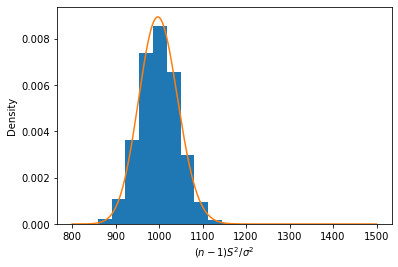

In [268]:
nums2 = np.linspace(800,1500,10000)
chi_rv = chi2(n-1)

plt.hist(var2_list,density=True)
plt.plot(nums2,chi_rv.pdf(nums2))
plt.xlabel("$(n-1)S^2/\sigma^2$")
plt.ylabel("Density")

Here, we see that, 

$$ S^2 \sim \frac{\sigma^2 \chi_{n-1}^2}{n-1}$$

where we can derive the pdf of the latter via the CDF method. Specifically, since know $f_{\chi^2_{n-1}}(x)$, we'll see that this new random variable has pdf $f_{\chi^2_{n-1}}(\frac{n-1}{\sigma^2}x) \cdot \frac{n-1}{\sigma^2}$

Text(0, 0.5, 'Density')

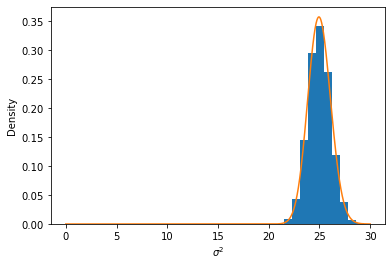

In [269]:
nums = np.linspace(0,30,10000)

plt.hist(var_list,density=True)
plt.plot(nums,(n-1)/stdev**2*chi_rv.pdf(((n-1)/stdev**2*nums)))
plt.xlabel("$\sigma^2$")
plt.ylabel("Density")

# Investigating the idea of confidence intervals

In [406]:
# Run this to use dataset
import seaborn as sns

df = sns.load_dataset('taxis')
popn = df['fare']
popn = np.array(popn)

N = len(popn)

# Say, population parameters are known (but we try to estimate with our experiment)
popn_mean = np.mean(popn)
popn_var = np.var(popn)

In [421]:
# Run this to use random variates drawn from binomial with n = 100, p = 0.35

# Get a population of size N
popn = binom(100,0.35)
N = 10000

popn = popn.rvs(size=N)

# Say, population parameters are known (but we try to estimate with our experiment)
popn_mean = np.mean(popn)
popn_var = np.var(popn)

In [408]:
def sample_gen(popn, m, n):
    ''' To generate m samples of size n'''
    
    samples = np.zeros((m,n))
    popn_size = len(popn)
    
    
    inds = np.random.randint(0,popn_size, size = (m,n))
    sample = popn[inds]
    
    return sample

def conf_int(samples,a):
    m = samples.shape[0]
    n = samples.shape[1]
    
    # Using CLT to approximate distribution of X_bar, get a 100(1-a)% confidence interval for population mean, \mu.
    
    x_bars = np.mean(samples,axis = 1)

    # Here, we approximate distribution of X_bar with CLT. We say, \frac{(X_bar +- \mu)}{(\frac{\sigma}{\sqrt{n}}} \sim_{\mathcal{D}} \mathcal{N}(0,1)
    z = norm(0,1)

    pos_z = -z.ppf(a/2)

    # Compute confidence interval
    lower = x_bars - pos_z*popn_var/n**(1/2)
    upper = x_bars + pos_z*popn_var/n**(1/2)
    
    # Something stupid to make the plots work
    x_vals = []
    y_vals = []
    
    for i in range(m):
        x_vals.append(i)
        x_vals.append(i)
        y_vals.append(lower[i])
        y_vals.append(upper[i])
        
    return x_vals,y_vals,lower,upper
    

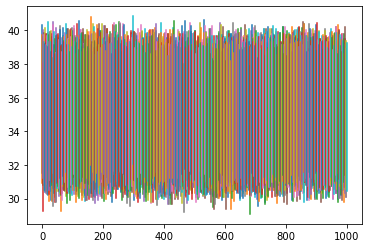

In [428]:
samples = sample_gen(popn,1000,100)
x,y,lower,upper = conf_int(samples,0.05) 

for i in range(0,len(x),2):
    plt.plot(x[i:i+2],y[i:i+2])
plt.show()

## 3.2 Get intersection of intervals

In [429]:
# Get minimum of the uppers, maximum of the lowers
min(upper)
max(lower)

# Count how many don't contain the popn_mean
missing = len(upper[upper < popn_mean]) + len(lower[lower > popn_mean])

Now, recall what we said about confidence intervals. We don't know $\mu$, so what we do is draw samples of draws $X_1,X_2...X_n$ i.i.d to get an idea of its value. Now, from each sample, we $\textit{can}$ determine $\overline{X}$. We might be interested in $\mathbb{P}[|\overline{X}-\mu| > c] = 1-\alpha$ - that is, we would be interested in knowing just what value $\overline{X}$ is telling us $\mu$ is. Since $\overline{X}$ is a random variable, however, it makes sense that $\textit{instances}$ of $\overline{X}$ give us not $\textit{precise}$ values for $\mu$, but rather probabilistic intervals. 

Now, if we invoke $CLT$ here, we know that $\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim_{\mathcal{D}} \mathcal{N}(0,1)$, so that $$\mathbb{P}[|\overline{X}-\mu| > c] = \mathbb{P}[\frac{|\overline{X}-\mu|}{\frac{\sigma}{\sqrt{n}}} > \frac{c}{\frac{\sigma}{\sqrt{n}}} = c'] $$

$$= \mathbb{P}[ -c' < \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}} < c'] $$ $$ \approx \mathbb{P}[ -c' < Z < c']$$

And if we want to $\textit{force}$ our interval to have certain probability, say $1-\alpha$, we may simply solve for $c \in \mathbb{R}$ s.t. 

$$ \mathbb{P}[ -c' < Z < c'] = 1-\alpha$$

We designate this solved $c$ as $z(\alpha/2)$. Plugging it back, we have 

$$\mathbb{P}[ -z(\alpha/2) < \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}} < z(\alpha/2)] $$

 $$ = \mathbb{P}[ \overline{X} - z(\alpha/2)\frac{\sigma}{\sqrt{n}} < \mu < \overline{X} + z(\alpha/2)]\frac{\sigma}{\sqrt{n}}] = 1 - \alpha $$

We call $ (\overline{X} - z(\alpha/2)\frac{\sigma}{\sqrt{n}}, \overline{X} + z(\alpha/2)]\frac{\sigma}{\sqrt{n}}) $ a $(1-\alpha)$ interval for $\mu$. 

(1) If we  get $m$ samples and compute $\overline{X}$ for all of them, we will expect $(1-\alpha)m$ of them to contain the fixed $\mu$. And so, confidence intervals are only useful when you are consdering multiple samples. "Frequentism".

(2) Note that the bigger $\alpha$ is (i.e. the area to the left and right combined), the smaller $z(\alpha/2)$ is (i.e. it gets closer to 0), and so, the smaller the interval is (thus, it gives us more precise information about $\mu$). So, if we get $\overline{X}$ that are closer to each other across samples (iff the population is 'homogenous' in a sense), then we will have a very good idea of where $\mu$ is BECAUSE even at bigger $\alpha$, the intervals are more likely to intersect. This happens with the binomial-generated population above.

For smaller $\alpha$, however, we will usually get intervals that likely agree with each other $\textit{regardless}$ of the population. However, these intervals will also be bigger, so we get less information in a way.

(Page 218 of Rice is also valuable)

"The confidence level represents the long-run proportion of corresponding CIs that contain the true value of the parameter. For example, out of all intervals computed at the 95% level, 95% of them should contain the parameter's true value." See https://en.wikipedia.org/wiki/Confidence_interval#Interpretation

## Seeing the law of total expectation and variance, in action 

In [434]:
from scipy.stats import binom
from scipy.stats import bernoulli

In [566]:
n = 10
p = 1/2

Y = binom(n,p)

In [591]:
m = 10000
# Toss your coin 10 times, and repeat this 100 times. 
y = Y.rvs(m)

In [592]:
np.mean(y)

4.9837

In [593]:
do_you_win_trials = np.zeros((1,n*m))
exp_value = []

# For each of the above 100 times, you have a y/10 chance of winning money.
for i in range(len(y)):

    X = bernoulli(y[i]/n) # Consider the toss
    do_you_win_trials[0,i:(i+m)] = X.rvs(m)  # Compute the probability you win
    exp_value.append(X.mean())
    

In [599]:
np.unique(do_you_win_trials,return_counts=True)

(array([0., 1.]), array([91959,  8041]))

In [594]:
sum(exp_value)/len(exp_value)

0.49836999999999987

In [590]:
do_you_win_trials

array([[0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 